# Assignment 2 - Introduction to Python for Data Science Program
#### **Nama: Ika Nurfitriani**
#### **Kode Peserta: PYTN-KS10-008**

# Short Description of The Assignment
This assignment is a project intended as the **second** assignment in a self-study class at PT Hacktivate Teknologi Indonesia. In this project, we will analyze the NYC Property Sales data from September 2016 to September 2017. Students are asked to formulate questions, then answer and drawing conclusions from the overall analysis that has been made. This assignment is made by taking into account all the assessment rubrics that have been set and will be checked by the teacher of each class.

# Project Overview
Dataset NYC Property Sales From Kaggle. This dataset is a record of every building or building unit (apartment, etc) sold in New York City property market over a 12-month period from September 2016 to September 2017.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
1. BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
2. BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
3. BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:
- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

# A. Install Required Libraries
Di tahap ini, akan saya lewatkan karena library yang dibutuhkan sudah terinstall. Adanya bagian ini ditujukan untuk orang awam atau pemula yang belum mengenal data science menggunakan Python.

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels

# B. Import Required Libraries
Di tahap ini, saya mengimpor beberapa library yang dibutuhkan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
import statsmodels.api as sm
%matplotlib inline

# C. Preparation and Preprocessing Dataset
Di tahap ini data dalam dataset akan melalui berbagai proses untuk memastikan bahwa data siap digunakan untuk dianalisis.

## 1. Membaca dan melihat beberapa informasi dataset

In [2]:
# Mendeteksi macam-macam format non standard missing values
miss_values = ['NA', 'NaN', 'na', 'n/a', 'n-a' "--", "?"]

# Membaca dataset
df_nycsales = pd.read_csv('./dataset/nyc-rolling-sales.csv', na_values=miss_values)

# Melihat 5 data teratas dari dataset
df_nycsales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# Melihat 5 data terakhir dari dataset
df_nycsales.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [4]:
# Melihat informasi tentang dataset
df_nycsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
# Melihat informasi dimensi dari dataset
rows, columns = df_nycsales.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
84548 baris
22 kolom


In [6]:
# Melihat range index dataset
df_nycsales.index

RangeIndex(start=0, stop=84548, step=1)

In [7]:
# Melihat daftar indeks dataset
df_nycsales.index.values

array([    0,     1,     2, ..., 84545, 84546, 84547], dtype=int64)

In [8]:
# Mengetahui daftar kolom yang ada dalam dataset
df_nycsales.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

## 2. Mengetahui semua nilai unik dari setiap kolom

In [9]:
# Melihat data yang unik
df_nycsales.nunique()

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

In [10]:
# Melihat semua nilai unik dari setiap kolom untuk melihat adanya anomali (unstandard missing values)
for col in df_nycsales.columns:
    print("UNIQUE VALUES FOR",col)
    print("="*100)
    print(df_nycsales[col].unique())
    print("="*100)

UNIQUE VALUES FOR Unnamed: 0
[    4     5     6 ... 26737 26738 26739]
UNIQUE VALUES FOR BOROUGH
[1 2 3 4 5]
UNIQUE VALUES FOR NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTO

### KESIMPULAN ANALISIS
***
Dari analisis di atas, beberapa kolom masih terdapat unstandard missing values yang tidak berhasil diidentifikasi oleh Pandas sebagai missing values. Berikut ini adalah rangkumannya:
1. Kolom "Unnamed: 0" dan kolom 'EASE-MENT' tidak diperlukan untuk analisis berikutnya, sehingga akan dibuang.
2. Kolom 'TAX CLASS AT PRESENT' mengandung nilai (' ') yang diidentifikasi sebagai missing values.
3. Kolom 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER' mengandung nilai (' ') yang diidentifikasi sebagai missing values.
4. Kolom 'ZIP CODE', 'YEAR BUILT', 'TOTAL UNITS' mengandung nilai (0) yang diidentifikasi sebagai missing values.
5. Kolom 'SALE PRICE' mengandung nilai (' - ') yang diidentifikasi sebagai missing values, selanjutnya nilai ini akan diganti dengan 0 dan dianggap tidak ada transaksi.

## 3. Data Cleaning
### Baca ulang dataset dengan menambahkan unstandard missing values

In [11]:
# Menambahkan beberapa format non standard missing values
miss_values = ['NA', 'NaN', 'na', 'n/a', 'n-a' "--", "?", ' ',' -  ']

# Membaca dataset
df_nycsales = pd.read_csv('./dataset/nyc-rolling-sales.csv', na_values=miss_values)

In [12]:
# Mengubah nilai 0 di kolom YEAR BUILT, ZIP CODE, TOTAL UNIT dengan np.nan
df_nycsales['YEAR BUILT']=df_nycsales['YEAR BUILT'].replace({0:np.nan})
df_nycsales['ZIP CODE']=df_nycsales['ZIP CODE'].replace({0:np.nan})
df_nycsales['TOTAL UNITS']=df_nycsales['TOTAL UNITS'].replace({0:np.nan})

### Mengecek ulang adanya missing values (unstandard missing values)

In [13]:
# Mengecek jumlah missing values pada setiap kolom
df_nycsales.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [14]:
# Mengecek persentase dan jumlah missing value
missing_value = df_nycsales.isnull().sum()/len(df_nycsales)*100
print(pd.DataFrame([missing_value[missing_value>0], 
    pd.Series(df_nycsales.isnull().sum()[df_nycsales.isnull().sum()>1000])],
    index=['percent missing', 'num of missing']))

                 TAX CLASS AT PRESENT  EASE-MENT  BUILDING CLASS AT PRESENT  \
percent missing              0.872877      100.0                   0.872877   
num of missing                    NaN    84548.0                        NaN   

                 APARTMENT NUMBER  ZIP CODE   TOTAL UNITS  LAND SQUARE FEET  \
percent missing         77.466055   1.16147     23.373705         31.049818   
num of missing       65496.000000       NaN  19762.000000      26252.000000   

                 GROSS SQUARE FEET   YEAR BUILT   SALE PRICE  
percent missing          32.658372     8.243838     17.22217  
num of missing        27612.000000  6970.000000  14561.00000  


### Menghapus kolom-kolom yang tidak diperlukan

In [15]:
# Menghapus kolom-kolom yang tidak dibutuhkan
df_nycsales.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], axis=1, inplace=True)

# Tampilkan 5 data teratas
df_nycsales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00


### Mengganti Nilai pada Missing Values

In [16]:
# Mengganti nilai missing values pada kolom kategorik dengan nilai modusnya
categoric_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoric_columns:
    df_nycsales[cat_col].fillna(df_nycsales[cat_col].mode()[0],inplace=True)

In [17]:
# Mengganti nilai missing values untuk kolom numerik (kecuali SALE PRICE) dengan nilai mediannya
float_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns:
    df_nycsales[float_col].fillna(df_nycsales[float_col].median(),inplace=True)

### Menghapus sisa kolom yang masih memuat missing values

In [18]:
df_nycsales.dropna(inplace=True)

In [19]:
# Mengecek dan melihat informasi dataset
df_nycsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52363 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52363 non-null  int64  
 1   NEIGHBORHOOD                    52363 non-null  object 
 2   BUILDING CLASS CATEGORY         52363 non-null  object 
 3   TAX CLASS AT PRESENT            52363 non-null  object 
 4   BLOCK                           52363 non-null  int64  
 5   LOT                             52363 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52363 non-null  object 
 7   ADDRESS                         52363 non-null  object 
 8   ZIP CODE                        52363 non-null  float64
 9   RESIDENTIAL UNITS               52363 non-null  int64  
 10  COMMERCIAL UNITS                52363 non-null  int64  
 11  TOTAL UNITS                     52363 non-null  float64
 12  LAND SQUARE FEET                

### Mengecek dan menghapus baris duplikat

In [20]:
# Mengecek semua baris duplikat
df_nycsales[
    df_nycsales.duplicated()
]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,252 SEVENTH AVENUE,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05 00:00:00
2296,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,24,1123,R4,40 BROAD STREET,10004.0,1,0,1.0,2325.0,1680.0,1982.0,2,R4,1200000.0,2017-04-28 00:00:00
3427,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,879,1207,R4,148 EAST 24TH STREET,10010.0,1,0,1.0,2325.0,1680.0,2009.0,2,R4,716000.0,2017-04-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,3 HELENA ROAD,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02 00:00:00
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,160 CASTLETON AVENUE,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22 00:00:00
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,3 CLINTON COURT,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21 00:00:00
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,441 OAKLAND AVENUE,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30 00:00:00


In [21]:
# Menghitung total baris duplikat
rows_duplicated = df_nycsales.duplicated()
print(rows_duplicated.sum())

339


In [22]:
# Membuang baris duplikat
df_nycsales.drop_duplicates(subset=df_nycsales.columns,keep='first', inplace=True)

# Melihat dimensi data setelah menghapus baris duplikat
df_nycsales.shape

(52024, 19)

### Mengubah tipe data setiap kolom dengan tipe seharusnya
- Kolom Kategorikal (String): <br>
('BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT')
- Kolom Float (Bilangan rasional): <br>
('SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET')
- Kolom Integer (Bilangan bulat): <br>
(BLOCK, LOT)

In [23]:
categoric_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# Mengubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoric_columns:
    df_nycsales[col] = df_nycsales[col].astype('str')

# Mengubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df_nycsales[col] = df_nycsales[col].astype('float64')

# Mengubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df_nycsales[col] = df_nycsales[col].astype('int64')

In [24]:
# Mengecek tipe data semua kolom setelah diubah
df_nycsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52024 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52024 non-null  object 
 1   NEIGHBORHOOD                    52024 non-null  object 
 2   BUILDING CLASS CATEGORY         52024 non-null  object 
 3   TAX CLASS AT PRESENT            52024 non-null  object 
 4   BLOCK                           52024 non-null  int64  
 5   LOT                             52024 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52024 non-null  object 
 7   ADDRESS                         52024 non-null  object 
 8   ZIP CODE                        52024 non-null  object 
 9   RESIDENTIAL UNITS               52024 non-null  int64  
 10  COMMERCIAL UNITS                52024 non-null  int64  
 11  TOTAL UNITS                     52024 non-null  float64
 12  LAND SQUARE FEET                

### Mengganti nilai pada kolom 'BOROUGH' dengan nilai yang seharusnya dan menjadi tipe string

In [25]:
df_nycsales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

### Modifikasi kolom 'SALE DATE'
Mengubah kolom 'SALE DATE' menjadi tipe datetime serta menambahkan kolom year, month, date, lalu menghapus kolom 'SALE DATE'

In [26]:
df_nycsales['SALE DATE'] = pd.to_datetime(df_nycsales['SALE DATE'])
df_nycsales['SALE YEAR'] = df_nycsales['SALE DATE'].dt.year
df_nycsales['SALE MONTH'] = df_nycsales['SALE DATE'].dt.month_name()
df_nycsales['SALE DATE dt'] = df_nycsales['SALE DATE'].dt.day
df_nycsales['SALE DAY'] = df_nycsales['SALE DATE'].dt.day_name()
df_nycsales.drop('SALE DATE',inplace=True, axis=1)

# rename kolom SALE DATE dt menjadi SALE DATE
df_nycsales.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

In [27]:
# Re-index dataframe setelah dilakukan preprocessing
df_nycsales.index = range(0,len(df_nycsales))

# Melihat kembali dimensi dataset
row, column = df_nycsales.shape
print("Dimensi data:")
print(row, "baris")
print(column, "kolom")

Dimensi data:
52024 baris
22 kolom


In [28]:
# Menghapus Outliers/Pencilan
# Hitung kuartile 3 setiap atribut pada data
Q3 = df_nycsales.quantile(0.75)

# Hitung kuartile 1 setiap atribut pada data
Q1 = df_nycsales.quantile(0.25)

# Hitung nilai IQR (selisih Q3 dan Q1)
IQR = Q3 - Q1
steps = 1.5

# Mencari data yang berada dalam rentang (bukan outlier)
df_filtered = df_nycsales[
    ~((df_nycsales < (Q1 - steps* IQR)) |(df_nycsales > (Q3 + steps * IQR))).any(axis=1)
]

# melakukan indexing ulang pada dataframe karena indexnya berantakan setelah dilakukan penghapusan data outliers
df_filtered.index = [i for i in range(len(df_filtered))]
df_nycsales = df_filtered

C:\Users\Ika N\AppData\Local\Temp\ipykernel_9768\917721031.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ~((df_nycsales < (Q1 - steps* IQR)) |(df_nycsales > (Q3 + steps * IQR))).any(axis=1)


### Menampilkan DataFrame setelah preprocessing

In [29]:
# Menampilkan 5 data teratas
df_nycsales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,10009.0,1,...,2325.0,1680.0,1920.0,2,R2,620000.0,2016,December,30,Friday
1,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920.0,2,R4,762669.0,2016,September,21,Wednesday
2,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920.0,2,R4,772851.0,2016,September,12,Monday
3,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1005,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920.0,2,R4,1034880.0,2016,November,3,Thursday
4,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1009,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920.0,2,R4,800000.0,2016,September,7,Wednesday


In [30]:
# Menampilkan 5 data terakhir
df_nycsales.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
31784,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,249,B2,48 WHITE OAK LANE,10309.0,2,...,4350.0,2840.0,1996.0,1,B2,625000.0,2016,October,18,Tuesday
31785,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,125 DARNELL LANE,10309.0,2,...,3325.0,1300.0,1995.0,1,B2,509000.0,2016,October,31,Monday
31786,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309.0,2,...,2400.0,2575.0,1998.0,1,B9,450000.0,2016,November,28,Monday
31787,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309.0,2,...,2498.0,2377.0,1998.0,1,B9,550000.0,2017,April,21,Friday
31788,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309.0,2,...,4000.0,1496.0,1925.0,1,B2,460000.0,2017,July,5,Wednesday


In [31]:
# Menghitung value dari kolom BOROUGH
df_nycsales['BOROUGH'].value_counts()

Queens           10523
Brooklyn         10001
Staten Island     4176
Manhattan         3629
Bronx             3460
Name: BOROUGH, dtype: int64

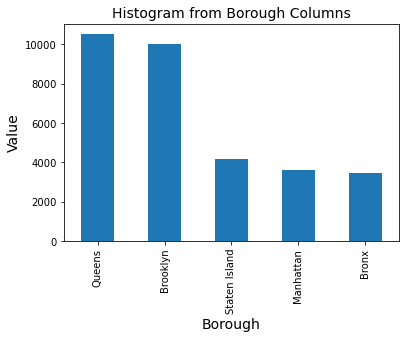

In [32]:
# Membuat histogram dari kolom BOROUGH
df_nycsales['BOROUGH'].value_counts().plot(kind='bar')
plt.title('Histogram from Borough Columns', fontsize=14)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()

In [33]:
# Menghitung value dari kolom NEIGHBORHOOD
df_nycsales['NEIGHBORHOOD'].value_counts().head(70)

FLUSHING-NORTH              1513
BEDFORD STUYVESANT           695
EAST NEW YORK                685
FLATBUSH-EAST                612
CANARSIE                     585
                            ... 
FLATLANDS                    182
MASPETH                      179
OCEAN PARKWAY-SOUTH          176
KIPS BAY                     174
SCHUYLERVILLE/PELHAM BAY     170
Name: NEIGHBORHOOD, Length: 70, dtype: int64

### Menampilkan rangkuman pengecekan missing values

In [34]:
df_nycsales.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE YEAR                         0
SALE MONTH                        0
SALE DATE                         0
SALE DAY                          0
dtype: int64

In [35]:
# Menampilkan informasi tentang dataset
df_nycsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31789 entries, 0 to 31788
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         31789 non-null  object 
 1   NEIGHBORHOOD                    31789 non-null  object 
 2   BUILDING CLASS CATEGORY         31789 non-null  object 
 3   TAX CLASS AT PRESENT            31789 non-null  object 
 4   BLOCK                           31789 non-null  int64  
 5   LOT                             31789 non-null  int64  
 6   BUILDING CLASS AT PRESENT       31789 non-null  object 
 7   ADDRESS                         31789 non-null  object 
 8   ZIP CODE                        31789 non-null  object 
 9   RESIDENTIAL UNITS               31789 non-null  int64  
 10  COMMERCIAL UNITS                31789 non-null  int64  
 11  TOTAL UNITS                     31789 non-null  float64
 12  LAND SQUARE FEET                

### KESIMPULAN ANALISIS
***
Di tahap preprocessing, berikut terdapat beberapa hal yang telah saya lakukan yaitu:
1. Menghapus kolom-kolom yang tidak diperlukan
2. Mengganti nilai missing values pada kolom kategorik dengan nilai modusnya dan untuk kolom numerik (kecuali SALE PRICE) dengan nilai median.
3. Menghapus baris duplikat pada dataset
4. Mengubah tipe data setiap kolom sesuai dengan tipe yang seharusnya
5. Mengganti nilai pada kolom 'BOROUGH' dengan nilai yang seharusnya dan menjadi tipe String
6. Modifikasi kolom 'SALE DATE' menjadi tipe datetime serta menambahkan kolom year, month, dan date.
7. Menghapus outliers.

# D. Measure of Central Tedency
## 1. Measure of Central Tedency: Mean
***
Di bagian ini, saya akan mencari mean sesuai dengan pertanyaan yang ada di bagian Question.<br>
**Question**: <br>
1. Berapa nilai rata-rata dari harga jual (SALE PRICE) di wilayah Brooklyn?
2. Berapa nilai rata-rata dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn?

**Answer Question 1**

In [36]:
# Mean dari harga jual (SALE PRICE) di wilayah Brooklyn
avg1 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['SALE PRICE'].mean()

print('Mean dari harga jual (SALE PRICE) di wilayah Brooklyn:', avg1)

Mean dari harga jual (SALE PRICE) di wilayah Brooklyn: 474105.62593740626


**Answer Question 2**

In [37]:
# Mean dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn
avg2 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['GROSS SQUARE FEET'].mean()

# Mean dari luas tanah properti di wilayah Brooklyn
avg3 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['LAND SQUARE FEET'].mean()

print('Mean dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn:', avg2)
print('Mean dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn:', avg3)

Mean dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn: 2096.006299370063
Mean dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn: 2222.5992400759924


### Kesimpulan/Analisis Jawaban:
Dari hasil analisis di atas didapatkan rata-rata dari harga jual (SALE PRICE) di wilayah Brooklyn adalah 474105.62593740626. 
Lalu rata-rata dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn adalah 2096.006299370063. 
Dan rata-rata dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn adalah 2222.5992400759924.

## 2. Measure of Central Tedency: Median
***
Di bagian ini, saya akan mencari median sesuai dengan pertanyaan yang ada di bagian Question.<br>
**Question:**
1. Berapa nilai median dari harga jual (SALE PRICE) di wilayah Brooklyn?
2. Berapa nilai median dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn?

**Answer Question 1**

In [38]:
# Median dari harga jual (SALE PRICE) di wilayah Brooklyn
med1 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['SALE PRICE'].median()

print('Median dari harga jual (SALE PRICE) di wilayah Brooklyn:', med1)

Median dari harga jual (SALE PRICE) di wilayah Brooklyn: 400000.0


**Answer Question 2**

In [39]:
# Median dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn
med2 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['GROSS SQUARE FEET'].median()

# Median dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn
med3 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['LAND SQUARE FEET'].median()

print('Median dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn:', med2)
print('Median dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn:', med3)

Median dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn: 2040.0
Median dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn: 2000.0


### Kesimpulan/Analisis Jawaban:
Dari hasil analisis di atas didapatkan median dari harga jual (SALE PRICE) di wilayah Brooklyn adalah 400000.0. 
Lalu median dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn adalah 2040.0. 
Dan median dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn adalah 2000.0.

## 3. Measure of Central Tedency: Modus
***
Di bagian ini, saya akan mencari modus sesuai dengan pertanyaan yang ada di bagian Question.<br>
**Question:**
1. Berapa nilai modus dari tahun properti dibangun (YEAR BUILT) di wilayah Brooklyn?
2. Berapa nilai modus dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn?

**Answer Question 1**

In [40]:
# Membuat dataframe baru yang hanya terdapat kolom Brooklyn BOROUGH dan YEAR BUILT
df_yb = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['YEAR BUILT']
modus_yb = scistats.mode(df_yb)

# Mencetak informasi modus dan jumlah munculnya modus tersebut
print(modus_yb.mode)
print(modus_yb.count)

['1920.0']
[1354]


**Answer Question 2**

In [41]:
# Membuat dataframe baru yang hanya terdapat kolom Brooklyn BOROUGH dan GROSS SQUARE FEET
df_gsf = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['GROSS SQUARE FEET']
modus_gsf = scistats.mode(df_gsf)

# Mencetak informasi modus dan jumlah munculnya modus tersebut
print(modus_gsf.mode)
print(modus_gsf.count)

[2400.]
[145]


In [42]:
# Membuat dataframe baru yang hanya terdapat kolom Brooklyn BOROUGH dan LAND SQUARE FEET
df_lsf = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['LAND SQUARE FEET']
modus_lsf = scistats.mode(df_lsf)

# Mencetak informasi modus dan jumlah munculnya modus tersebut
print(modus_lsf.mode)
print(modus_lsf.count)

[2000.]
[1846]


### Kesimpulan/Analisis Jawaban:
Dari hasil analisis di atas didapatkan modus dari tahun properti dibangun (YEAR BUILT) di wilayah Brooklyn adalah 1920 dengan kemunculan sebanyak 1354. 
Lalu modus dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn adalah 2400 dengan kemunculan sebanyak 145. 
Dan modus dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn adalah 2000 dengan kemunculan sebanyak 1846.

# E. Measured of Spread
## 1. Measured of Spread: Range
***
Di bagian ini, saya akan mencari range sesuai dengan pertanyaan yang ada di bagian Question.<br>
**Question:** <br>
1. Berapakah range/rentang data dari harga jual (SALE PRICE) di wilayah Brooklyn?
2. Berapa range/rentang data dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn?

**Answer Question 1**

In [43]:
# Mencari nilai maximum dan minimum lalu mencari range dari harga jual (SALE PRICE) di wilayah Brooklyn
df_max = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['SALE PRICE'].max()
df_min = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['SALE PRICE'].min()
df_range = df_max - df_min

print(f"Nilai harga jual tertinggi di wilayah Brooklyn adalah", df_max)
print(f"Nilai harga jual terendah di wilayah Brooklyn adalah", df_min)
print(f"Range antara harga jual tertinggi dan terendah di wilayah Brooklyn adalah", df_range)

Nilai harga jual tertinggi di wilayah Brooklyn adalah 2100000.0
Nilai harga jual terendah di wilayah Brooklyn adalah 0.0
Range antara harga jual tertinggi dan terendah di wilayah Brooklyn adalah 2100000.0


**Answer Question 2**

In [44]:
# Mencari nilai maximum dan minimum lalu mencari range dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn
df_max_gsf = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['GROSS SQUARE FEET'].max()
df_min_gsf = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['GROSS SQUARE FEET'].min()
df_range_gsf = df_max_gsf - df_min_gsf

print(f"Luas total semua lantai bangunan tertinggi di wilayah Brooklyn adalah", df_max_gsf)
print(f"Luas total semua lantai bangunan terendah di wilayah Brooklyn adalah", df_min_gsf)
print(f"Range antara Luas total semua lantai bangunan tertinggi dan terendah di wilayah Brooklyn adalah", df_range_gsf)

Luas total semua lantai bangunan tertinggi di wilayah Brooklyn adalah 4048.0
Luas total semua lantai bangunan terendah di wilayah Brooklyn adalah 0.0
Range antara Luas total semua lantai bangunan tertinggi dan terendah di wilayah Brooklyn adalah 4048.0


### Kesimpulan/Analisis Jawaban:
Dari hasil analisis di atas didapatkan range/perbedaan antara harga jual (SALE PRICE) tertinggi dan terendah di wilayah Brooklyn adalah 2100000.0.  
Dan range/perbedaan antara luas total semua lantai bangunan (GROSS SQUARE FEET) tertinggi dan terendah di wilayah Brooklyn adalah 4048.0.

## 2. Measured of Spread: Variance
***
Di bagian ini, saya akan mencari variance sesuai dengan pertanyaan yang ada di bagian Question.<br>
**Question:**
1. Berapa nilai variance dari harga jual (SALE PRICE) di wilayah Brooklyn?
2. Berapa nilai variance dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn?

**Answer Question 1**

In [45]:
# Variance dari harga jual (SALE PRICE) di wilayah Brooklyn
var1 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['SALE PRICE'].var()

print('Variance dari harga jual (SALE PRICE) di wilayah Brooklyn:', var1)

Variance dari harga jual (SALE PRICE) di wilayah Brooklyn: 265398564019.92996


**Answer Question 2**

In [46]:
# Variance dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn
var2 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['GROSS SQUARE FEET'].var()

# Variance dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn
var3 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['LAND SQUARE FEET'].var()

print('Variance dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn:', var2)
print('Variance dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn:', var3)

Variance dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn: 536218.190660314
Variance dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn: 413281.1535754159


### Kesimpulan/Analisis Jawaban
Dari hasil analisis di atas didapatkan variance dari harga jual (SALE PRICE) di wilayah Brooklyn adalah 265398564019.92996. 
Lalu variance dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn adalah 536218.190660314. 
Dan variance dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn adalah 413281.1535754159.

## 3. Measured of Spread: Standard Deviation
***
Di bagian ini, saya akan mencari standard deviation sesuai dengan pertanyaan yang ada di bagian Question.<br>
**Question:** <br>
1. Berapa nilai standard deviation dari harga jual (SALE PRICE) di wilayah Brooklyn?
2. Berapa nilai standard deviation dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn?

**Answer Quesntion 1**

In [47]:
# Standard deviation dari harga jual (SALE PRICE) di wilayah Brooklyn
std1 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['SALE PRICE'].std()

print('Standard deviation dari harga jual (SALE PRICE) di wilayah Brooklyn:', std1)

Standard deviation dari harga jual (SALE PRICE) di wilayah Brooklyn: 515168.48119807366


**Answer Quesntion 2**

In [48]:
# Standard deviation dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn
std2 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['GROSS SQUARE FEET'].std()

# Standard deviation dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn
std3 = df_nycsales[df_nycsales['BOROUGH']=='Brooklyn']['LAND SQUARE FEET'].std()

print('Standard deviation dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn:', std2)
print('Standard deviation dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn:', std3)

Standard deviation dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn: 732.2692064127195
Standard deviation dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn: 642.8694685357331


### Kesimpulan/Analisis Jawaban:
Dari hasil analisis di atas didapatkan standard deviation dari harga jual (SALE PRICE) di wilayah Brooklyn adalah 515168.48119807366. 
Lalu standard deviation dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn adalah 732.2692064127195. 
Dan standard deviation dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn adalah 642.8694685357331.

## 4. Measured of Spread: Probability Distribution
***
Di bagian ini, saya akan mencari probability distribution dan membuat kesimpulannya sesuai dengan pertanyaan yang ada di bagian Question.<br>
**Question:** <br>
1. Bagaimana probability distribution dari harga jual (SALE PRICE) di wilayah Staten Island?
2. Bagaimana probability distribution dari harga jual (SALE PRICE) di daerah MASPETH?

**Answer Question 1**

In [49]:
# Membuat dataframe baru berdasarkan wilayah Staten Island
df_pd_state  = df_nycsales[df_nycsales['BOROUGH'] == 'Staten Island']

# Menghapus beberapa kolom karena hanya membutuhkan kolom BOROUGH dan SALE PRICE
df_state = df_pd_state.drop(['YEAR BUILT', 'TOTAL UNITS', 'NEIGHBORHOOD', 'LOT', 'BLOCK','ZIP CODE',
                            'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                            'LAND SQUARE FEET','GROSS SQUARE FEET','BUILDING CLASS CATEGORY',
                           'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                            'ADDRESS','TAX CLASS AT TIME OF SALE',
                            'BUILDING CLASS AT TIME OF SALE', 'SALE DATE',
                            'SALE YEAR', 'SALE MONTH', 'SALE DAY'],
                           axis=1, inplace = False)

# Mengubah kolom BOROUGH menjadi index
df_pd_stateis = df_state.set_index(['BOROUGH'])
df_pd_stateis.head()

,SALE PRICE
BOROUGH,
Staten Island,437500.0
Staten Island,579000.0
Staten Island,370000.0
Staten Island,439000.0
Staten Island,300000.0


Text(0.5, 1.0, 'Probability Distribution of SALE PRICE in Staten Island Borough')

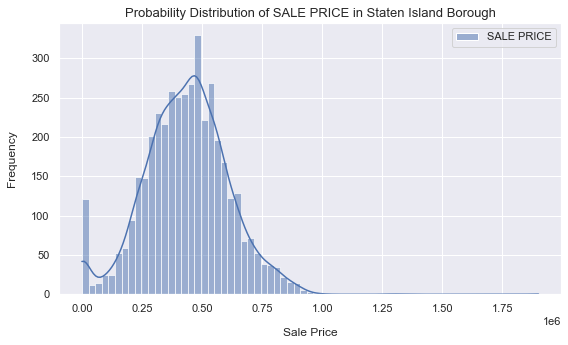

In [51]:
# Membuat histogram probability distribution
sns.set(rc={'figure.figsize':(9,5)})
sns.histplot(df_pd_stateis, kde=True)
plt.xlabel('Sale Price', labelpad=14)
plt.ylabel('Frequency', labelpad=14)
plt.title('Probability Distribution of SALE PRICE in Staten Island Borough', fontsize=13)

In [52]:
# Melihat skewness dari SALE PRICE di wilayah Staten Island
df_pd_stateis.skew()

SALE PRICE    0.07891
dtype: float64

**Answer Question 2**

In [53]:
# Membuat dataframe baru berdasarkan daerah MASPETH
df_pd_mp  = df_nycsales[df_nycsales['NEIGHBORHOOD'] == 'MASPETH']

# menghapus beberapa kolom karena hanya membutuhkan kolom NEIGHBORHOOD dan SALE PRICE
df_mp = df_pd_mp.drop(['YEAR BUILT', 'TOTAL UNITS', 'BOROUGH', 'LOT', 'BLOCK','ZIP CODE',
                            'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                            'LAND SQUARE FEET','GROSS SQUARE FEET','BUILDING CLASS CATEGORY',
                           'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                            'ADDRESS','TAX CLASS AT TIME OF SALE',
                            'BUILDING CLASS AT TIME OF SALE', 'SALE DATE',
                            'SALE YEAR', 'SALE MONTH', 'SALE DAY'],
                           axis=1, inplace = False)

# Mengubah kolom NEIGHBORHOOD menjadi index
df_pd_maspeth = df_mp.set_index(['NEIGHBORHOOD'])
df_pd_maspeth.head()

,SALE PRICE
NEIGHBORHOOD,
MASPETH,745000.0
MASPETH,898000.0
MASPETH,650000.0
MASPETH,665000.0
MASPETH,700000.0


Text(0.5, 1, 'Probability Distribution of SALE PRICE in Maspeth Neighborhood')

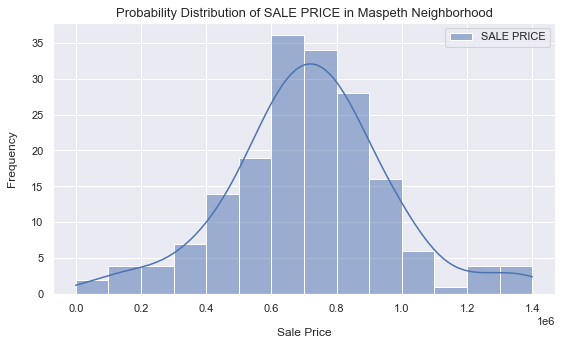

In [54]:
# Membuat histogram probability distribution
sns.set(rc={'figure.figsize':(9,5)})
sns.histplot(df_pd_maspeth, kde=True)
plt.xlabel('Sale Price', labelpad=14)
plt.ylabel('Frequency', labelpad=14)
plt.title('Probability Distribution of SALE PRICE in Maspeth Neighborhood', y=1, fontsize=13)

In [55]:
# Melihat skewness dari SALE PRICE di daerah MASPETH
df_pd_maspeth.skew()

SALE PRICE    0.072095
dtype: float64

### Kesimpulan/Analisis Jawaban:
Dari grafik pertama yang ditampilkan dan tidak adanya skewness maka dapat disimpulkan bahwa probability distribution harga penjualan (SALE PRICE) di wilayah Staten Island sudah berdistribusi normal. Dan dari grafik kedua yang ditampilkan dan tidak adanya skewness maka dapat disimpulkan bahwa probability distribution harga penjualan (SALE PRICE) di daerah Maspeth sudah berdistribusi normal.

## 5. Measured of Spread: Confidence Intervals
***
Di bagian ini, saya akan mencari confidence intervals sesuai dengan pertanyaan yang ada di bagian Question. Confidence Intervals adalah rentang antara dua nilai dimana nilai suatu Sample Mean tepat berada di tengah-tengahnya. <br>
**Question:**
1. Berapa Confidence Interval untuk luas tanah properti (LAND SQUARE FEET) di daerah BAYSIDE?
2. Berapa Confidence Interval untuk luas total semua lantai bangunan (GROSS SQUARE FEET) di daerah BAYSIDE?

**Answer Question 1**

In [56]:
# Membuat dataframe baru yang hanya terdapat kolom BAYSIDE NEIGHBORHOOD dan LAND SQUARE FEET
df_land = df_nycsales[df_nycsales['NEIGHBORHOOD']=='BAYSIDE']['LAND SQUARE FEET']

# Mencari mean, std, dan jumlah item dari dataframe baru
mean1 = df_land.mean()
std1 = df_land.std()
n1 = len(df_nycsales[df_nycsales['NEIGHBORHOOD']=='BAYSIDE'])

# Membuat variabel z untuk z score
z = 1.96 # z score untuk Confidence Level 95%

# Mencari standard error
se1 = std1 / np.sqrt(n1)

# Menghitung batas atas dan batas bawah
lower_bound1 = mean1 - z * se1
upper_bound1 = mean1 + z * se1

print('Confidence Interval luas tanah properti (LAND SQUARE FEET) di daerah BAYSIDE: [',lower_bound1,',',upper_bound1,']')

Confidence Interval luas tanah properti (LAND SQUARE FEET) di daerah BAYSIDE: [ 2898.8429408871393 , 3061.245226166225 ]


**Answer Question 2**

In [57]:
# Membuat dataframe baru yang hanya terdapat kolom BAYSIDE NEIGHBORHOOD dan GROSS SQUARE FEET
df_gros = df_nycsales[df_nycsales['NEIGHBORHOOD']=='BAYSIDE']['GROSS SQUARE FEET']

# Mencari mean, std, dan jumlah item dari dataframe baru
mean2 = df_gros.mean()
std2 = df_gros.std()
n2 = len(df_nycsales[df_nycsales['NEIGHBORHOOD']=='BAYSIDE'])

# Membuat variabel z untuk z score
z = 1.96 # z score untuk Confidence Level 95%

# Mencari standard error
se2 = std2 / np.sqrt(n2)

# Menghitung batas atas dan batas bawah
lower_bound2 = mean2 - z * se2
upper_bound2 = mean2 + z * se2

print('Confidence Interval luas total semua lantai bangunan (GROSS SQUARE FEET) di daerah BAYSIDE: [',lower_bound2,',',upper_bound2,']')

Confidence Interval luas total semua lantai bangunan (GROSS SQUARE FEET) di daerah BAYSIDE: [ 1650.2795534194877 , 1763.613718042229 ]


### Kesimpulan/Analisis Jawaban:
Dari hasil analisis di atas didapatkan confidence interval luas tanah properti (LAND SQUARE FEET) di daerah BAYSIDE adalah 2898.8429408871393 - 3061.245226166225, berarti nilai suatu sample mean berada antara rentang tersebut. 
Dan confidence interval luas total semua lantai bangunan (GROSS SQUARE FEET) di daerah BAYSIDE adalah 1650.2795534194877 - 1763.613718042229, berarti nilai suatu sample mean berada antara rentang tersebut.

## 6. Measured of Spread: Hypothesis Testing
***
Di bagian ini, saya akan menguji hipotesis dan menarik kesimpulan yang dihasilkan.<br>
**H0** : The Sale Prices of Properties in Brooklyn and Queens are equal <br>
**H1** : The Sale Prices of Properties in Brooklyn and Queens are not equal

In [58]:
# Membuat dataframe yang hanya terdapat kolom BOROUGH dan SALE PRICE
df_price = df_nycsales[['BOROUGH','SALE PRICE']]

# Membuat dataframe baru berdasarkan Brooklyn BOROUGH
df_brook = df_price[df_price['BOROUGH']=='Brooklyn'].drop('BOROUGH', axis=1)

# Membuat dataframe baru berdasarkan Queens BOROUGH
df_queens = df_price[df_price['BOROUGH']=='Queens'].drop('BOROUGH', axis=1)

# Mencari jumlah item, mean dan standard deviation dari wilayah Brooklyn
n_brook = len(df_brook)
mean_brook = df_brook['SALE PRICE'].mean()
std_brook = df_brook['SALE PRICE'].std()

# Mencari jumlah item, mean dan standard deviation dari wilayah Queens
n_queens = len(df_queens)
mean_queens = df_queens['SALE PRICE'].mean()
std_queens = df_queens['SALE PRICE'].std()

print('Wilayah Brooklyn:', n_brook,",",mean_brook,",",std_brook)
print('Wilayah Queens:', n_queens,",",mean_queens,",",std_queens)

Wilayah Brooklyn: 10001 , 474105.62593740626 , 515168.48119807366
Wilayah Queens: 10523 , 625807.1177420887 , 320874.4655168475


In [59]:
# Mencari p-value
z_score, pvalue = sm.stats.ztest(df_brook['SALE PRICE'].dropna(),
                                 df_queens['SALE PRICE'].dropna(),alternative='two-sided')

# Penarikan kesimpulan
if pvalue > 0.05:
    print('The Sale Prices of Properties in Brooklyn and Queens are equal')
else:
    print('The Sale Prices of Properties in Brooklyn and Queens are not equal')

The Sale Prices of Properties in Brooklyn and Queens are not equal


### Menampilkan plot dari distribusi data

Text(0, 0.5, 'FREQUENCY')

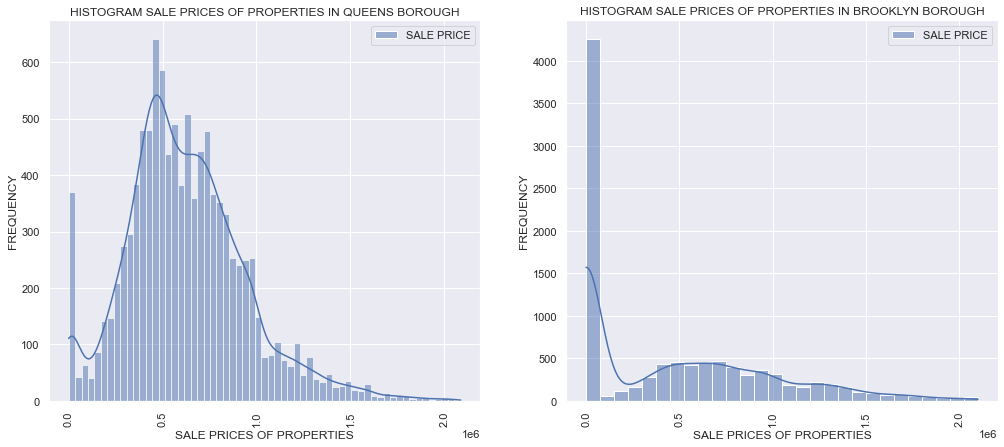

In [60]:
# Menampilkan distribusi dari data penjualan di wilayah Brooklyn dan Queens
fig = plt.figure(figsize=(17,7))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# Membuat dan mengatur plot untuk harga jual (SALE PRICE) di wilayah Brooklyn
sns.histplot(df_brook, kde=True, ax=ax0)
ax0.set_title('HISTOGRAM SALE PRICES OF PROPERTIES IN BROOKLYN BOROUGH')
ax0.set_xlabel('SALE PRICES OF PROPERTIES')
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('FREQUENCY')

# Membuat dan mengatur plot untuk harga jual (SALE PRICE) di wilayah Queens
sns.histplot(df_queens, kde=True, ax=ax)
ax.set_title('HISTOGRAM SALE PRICES OF PROPERTIES IN QUEENS BOROUGH')
ax.set_xlabel('SALE PRICES OF PROPERTIES')
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('FREQUENCY')

### Kesimpulan/Analisis Jawaban:
Berdasarkan hasil uji hipotesis menggunakan z-test dengan alternative two-sided, didapatkan bahwa H0 ditolak karena p-value < 0.05. Jadi dapat disimpulkan bahwa harga jual properti (SALE PRICES OF PROPERTIES) di wilayah Brooklyn dan Queens tidak sama.

# F. Overall Analysis
***
Pada bagian ini, saya akan merangkum hasil keseluruhan analisis yang telah saya lakukan. Berikut hasil keseluruhan analisis di atas:
1. Rata-rata dari harga jual (SALE PRICE) di wilayah Brooklyn adalah 474105.62593740626. Lalu rata-rata dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn adalah 2096.006299370063. Dan rata-rata dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn adalah 2222.5992400759924.
2. Median dari harga jual (SALE PRICE) di wilayah Brooklyn adalah 400000.0. Lalu median dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn adalah 2040.0. Dan median dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn adalah 2000.0.
3. Modus dari tahun properti dibangun (YEAR BUILT) di wilayah Brooklyn adalah 1920 dengan kemunculan sebanyak 1354. Lalu modus dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn adalah 2400 dengan kemunculan sebanyak 145. Dan modus dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn adalah 2000 dengan kemunculan sebanyak 1846.
4. Range/perbedaan antara harga jual (SALE PRICE) tertinggi dan terendah di wilayah Brooklyn adalah 2100000.0. Dan range/perbedaan antara luas total semua lantai bangunan (GROSS SQUARE FEET) tertinggi dan terendah di wilayah Brooklyn adalah 4048.0.
5. Variance dari harga jual (SALE PRICE) di wilayah Brooklyn adalah 265398564019.92996. Lalu variance dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn adalah 536218.190660314. Dan variance dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn adalah 413281.1535754159.
6. Standard deviation dari harga jual (SALE PRICE) di wilayah Brooklyn adalah 515168.48119807366. Lalu standard deviation dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Brooklyn adalah 732.2692064127195. Dan standard deviation dari luas tanah properti (LAND SQUARE FEET) di wilayah Brooklyn adalah 642.8694685357331.
7. Dari grafik pertama yang ditampilkan dan tidak adanya skewness maka dapat disimpulkan bahwa probability distribution harga penjualan (SALE PRICE) di wilayah Staten Island sudah berdistribusi normal. Dan dari grafik kedua yang ditampilkan dan tidak adanya skewness maka dapat disimpulkan bahwa probability distribution harga penjualan (SALE PRICE) di daerah Maspeth juga sudah berdistribusi normal.
8. Confidence interval luas tanah properti (LAND SQUARE FEET) di daerah BAYSIDE adalah 2898.8429408871393 - 3061.245226166225, berarti nilai suatu sample mean berada antara rentang tersebut. Dan confidence interval luas total semua lantai bangunan (GROSS SQUARE FEET) di daerah BAYSIDE adalah 1650.2795534194877 - 1763.613718042229, berarti nilai suatu sample mean berada antara rentang tersebut.
9. Berdasarkan hasil uji hipotesis menggunakan z-test dengan alternative two-sided, didapatkan bahwa H0 ditolak karena p-value < 0.05. Jadi dapat disimpulkan bahwa harga jual properti (SALE PRICES OF PROPERTIES) di wilayah Brooklyn dan Queens tidak sama.